# **Anomaly Detection with Isolation Forest: A Comprehensive Guide With 2D And 3D datasets**

This notebook provides a comprehensive guide to using the Isolation Forest algorithm for anomaly detection. Isolation Forest is a powerful unsupervised machine learning algorithm that is particularly effective for detecting anomalies in datasets. It operates by isolating observations through recursive partitioning, making it a highly efficient method for identifying outliers that deviate significantly from the normal data distribution.


**Advantages of Isolation Forest**

`Efficiency`: It is computationally efficient and can handle large datasets effectively.

`Scalability`: The algorithm scales well with both high-dimensional data and large datasets.

`No Need for Distance or Density Measures`: Isolation Forest does not rely on distance or density measures, making it less susceptible to the curse of dimensionality and more effective in high-dimensional spaces.



**Applications**

Isolation Forest is widely used in various applications, including fraud detection, network intrusion detection, fault detection in industrial systems, and any scenario where identifying rare or unusual events is crucial.

In summary, Isolation Forest is a powerful and versatile tool for anomaly detection, particularly well-suited for cases where anomalies are rare and deviate significantly from normal data.

#### Importing libraries

In [99]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

## **Demostrate for 2D dataset ->**

#### Create a 2D synthetic dataset  

In [100]:
# Make sample data points
X, _ = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_clusters_per_class=1,
                           flip_y=0.1,
                           random_state=42)

print("sample data\n",X)

sample data
 [[ 0.4585091  -1.00438829]
 [ 0.36855907 -1.35598715]
 [ 1.28008457  0.98453788]
 ...
 [ 1.41100391  0.47657249]
 [ 0.84292246  1.21271029]
 [ 3.33754789  0.25150309]]


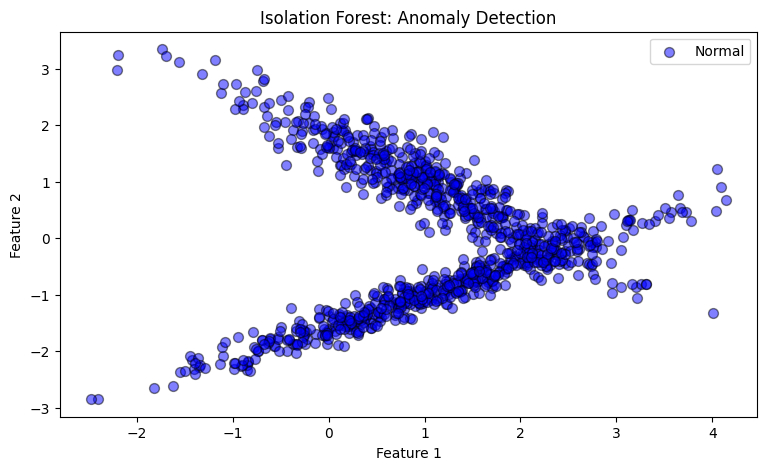

In [101]:
# change data points to np array
data = np.array(X)

# Set the fig size
plt.figure(figsize=(9, 5))

# Plot normal points
plt.scatter(data[:, 0], data[:, 1], c='blue', edgecolor='k', s=50, label='Normal', alpha=0.5)

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest: Anomaly Detection')
plt.legend()

# Show plot
plt.show()

#### Introduce some anomalies

In [102]:
# Generate random anomalies
rng = np.random.RandomState(42)
X_with_anomalies = np.concatenate([X, rng.uniform(low=-6, high=6, size=(50, 2))])

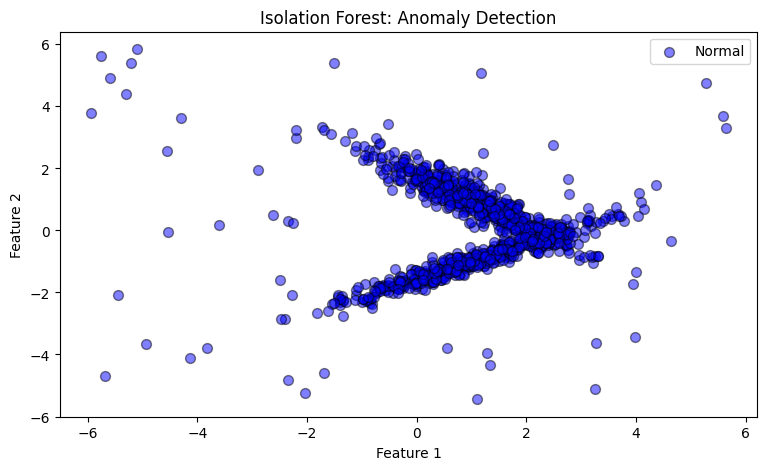

In [103]:
# change data points to np array
data = np.array(X_with_anomalies)

# Set the fig size
plt.figure(figsize=(9, 5))

# Plot normal points
plt.scatter(data[:, 0], data[:, 1], c='blue', edgecolor='k', s=50, label='Normal', alpha=0.5)

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest: Anomaly Detection')
plt.legend()

# Show plot
plt.show()

#### Scale the features

In [104]:
# Scale the features with standardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_anomalies)

#### Initialize and fit Isolation Forest

In [105]:
# Initialize Isolation Forest with 5% contamination (assiume 5% anomalies are there) and a fixed random state
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

#### Predict anomalies

In [106]:
# Get the predictions
predictions = iso_forest.predict(X_scaled)

 #### Convert -1 for anomalies and 1 for normal points

In [107]:
# Seperate to tow arrays
anomalies = np.where(predictions == -1)[0]
normal_points = np.where(predictions == 1)[0]

#### 2D Plotting

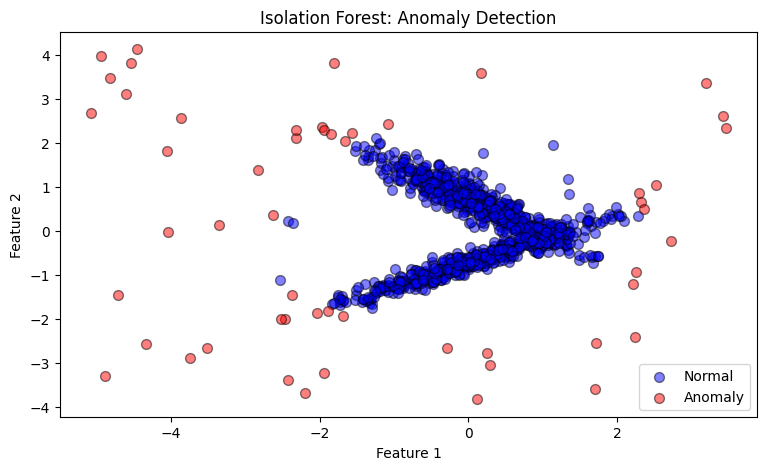

In [108]:
# Set figure
plt.figure(figsize=(9, 5))

# Plot normal points
plt.scatter(X_scaled[normal_points, 0], X_scaled[normal_points, 1],
            c='blue', edgecolor='k', s=50, label='Normal', alpha=0.5)

# Plot anomalies
plt.scatter(X_scaled[anomalies, 0], X_scaled[anomalies, 1],
            c='red', edgecolor='k', s=50, label='Anomaly', alpha=0.5)

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest: Anomaly Detection')
plt.legend()

# Show plot
plt.show()

## **Demostrate for 3D dataset ->**

#### Create a synthetic dataset

In [109]:
# Make sample data points
X, _ = make_classification(n_samples=1000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_clusters_per_class=1,
                           flip_y=0.1,
                           random_state=42)

print("sample data\n",X)

sample data
 [[ 0.95119494 -0.78129153  1.46053063]
 [-1.22878966 -1.18311957  1.4364098 ]
 [-0.56828758 -1.26967853  1.56502528]
 ...
 [ 1.39165196 -2.06019967  2.19273323]
 [-0.29935896 -0.59908069 -0.64391375]
 [-0.72422211 -0.71939082  0.10942548]]


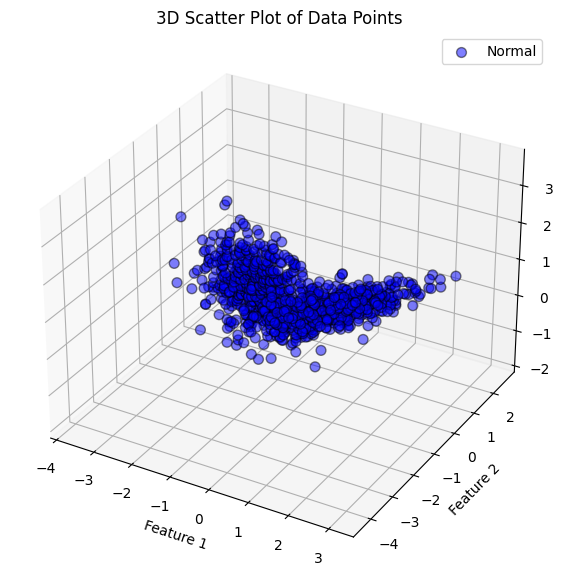

In [110]:
# Convert data points to numpy array
data = np.array(X)

# Set up the figure and the 3D subplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points in 3D
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', edgecolor='k', s=50, label='Normal', alpha=0.5)

# Adding labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Data Points')

# Add legend
ax.legend()

# Show plot
plt.show()

#### Introduce some anomalies


In [111]:
# Generate random anomalies
rng = np.random.RandomState(42)
X_with_anomalies = np.concatenate([X, rng.uniform(low=-6, high=6, size=(50, 3))])

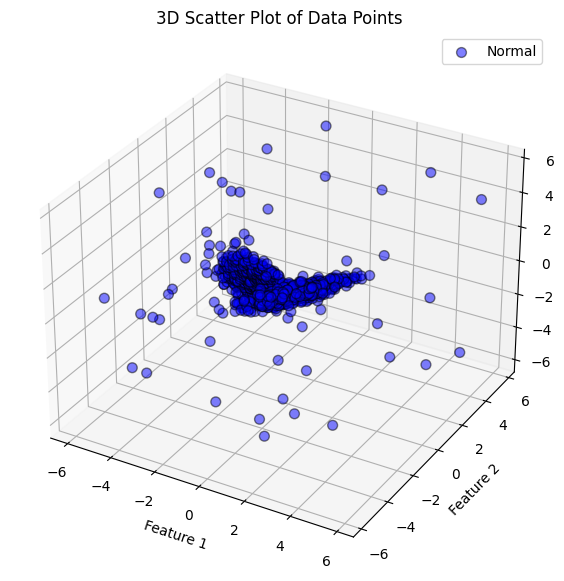

In [112]:
# Convert data points to numpy array
data = np.array(X_with_anomalies)

# Set up the figure and the 3D subplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points in 3D
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', edgecolor='k', s=50, label='Normal', alpha=0.5)

# Adding labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Data Points')

# Add legend
ax.legend()

# Show plot
plt.show()

#### Scale the features


In [113]:
# Scale the features with standardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_anomalies)

#### Initialize and fit Isolation Forest

In [114]:
# Initialize Isolation Forest with 5% contamination (assiume 5% anomalies are there) and a fixed random state
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

#### Predict anomalies

In [115]:
# Get the predictions
predictions = iso_forest.predict(X_scaled)

#### Convert -1 for anomalies and 1 for normal points


In [116]:
# Seperate to tow arrays
anomalies = np.where(predictions == -1)[0]
normal_points = np.where(predictions == 1)[0]

#### 3D Plotting

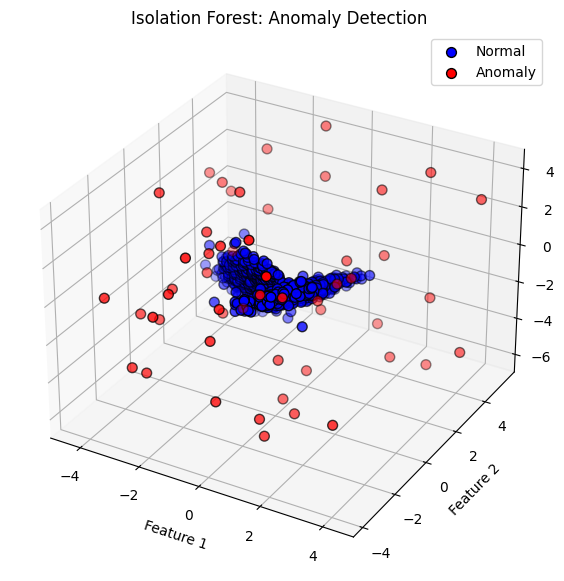

In [117]:
# Set figer size
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points
ax.scatter(X_scaled[normal_points, 0], X_scaled[normal_points, 1], X_scaled[normal_points, 2],
           c='blue', edgecolor='k', s=50, label='Normal')

# Plot anomalies
ax.scatter(X_scaled[anomalies, 0], X_scaled[anomalies, 1], X_scaled[anomalies, 2],
           c='red', edgecolor='k', s=50, label='Anomaly')

# Adding labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Isolation Forest: Anomaly Detection')

# Adding legend
ax.legend()

# Show plot
plt.show()


END